### Information Coefficient
---

* Use information Coefficient (IC) to evaluate the predictive value of signals

    * Correlation of a signal's predicted returns vs actual outcomes

    * Use `SPEARMAN RANK CORRELATION` instead of **Pearson** correlation. Spearman RANK, is a NON parametric correlation, that looks at rankings as opposed to linear correlation of the data

* Signals for algorithms can be used separately or in combination

    * Correlation among various signals needs to be analyzed

    * **Several weak signals may be combined to form a `STRONG` signal** (as in Random Forest)



In [1]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

/var/folders/ly/0xqts46d0xb6mpwwrttmy0tc0000gq/T/ipykernel_17487/1676161824.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
stock = pd.read_csv('../test_data/stock.csv', index_col=0)
stock

,open,high,low,close,volume,SMA_10d,SMA_20d
2023-04-18,291.570,291.755,287.0100,288.37,20161845.0,287.198,283.3990
2023-04-19,285.990,289.050,284.5400,288.45,17150271.0,287.325,284.1325
2023-04-20,285.250,289.030,285.0800,286.11,23244363.0,287.502,284.8235
2023-04-21,285.010,286.270,283.0608,285.76,21676387.0,286.918,285.2285
2023-04-24,282.090,284.950,278.7200,281.77,26611014.0,286.156,285.2885
...,...,...,...,...,...,...,...
2023-08-07,328.370,331.110,327.5200,330.11,17741526.0,334.215,339.7885
2023-08-08,326.960,328.750,323.0000,326.05,22327574.0,331.722,339.4675
2023-08-09,326.470,327.110,321.0499,322.23,22373268.0,330.168,338.7190
2023-08-10,326.015,328.260,321.1800,322.93,20113725.0,329.389,337.7325


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 2023-04-18 to 2023-08-11
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     81 non-null     float64
 1   high     81 non-null     float64
 2   low      81 non-null     float64
 3   close    81 non-null     float64
 4   volume   81 non-null     float64
 5   SMA_10d  81 non-null     float64
 6   SMA_20d  81 non-null     float64
dtypes: float64(7)
memory usage: 5.1+ KB


<Axes: >

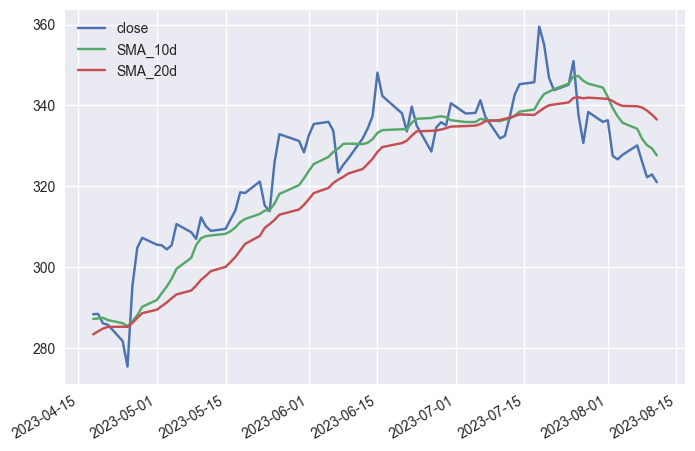

In [5]:
# fixing index
stock.index = pd.to_datetime(stock.index)
stock[['close', 'SMA_10d', 'SMA_20d']].plot()

**DATA IMPORTED SUCCESSFULLY**

### Evaluating Signals

Signals Dataframe, SMA crossovers

In [6]:
signal = pd.DataFrame()
signal['crossover'] = stock['SMA_10d'] - stock['SMA_20d']
signal.tail()

,crossover
2023-08-07,-5.5735
2023-08-08,-7.7455
2023-08-09,-8.5510
2023-08-10,-8.3435
2023-08-11,-8.8680


Joining the DFs

In [9]:
stock_signals = stock.join(signal, how='left')
stock_signals

,open,high,low,close,volume,SMA_10d,SMA_20d,crossover
2023-04-18,291.570,291.755,287.0100,288.37,20161845.0,287.198,283.3990,3.7990
2023-04-19,285.990,289.050,284.5400,288.45,17150271.0,287.325,284.1325,3.1925
2023-04-20,285.250,289.030,285.0800,286.11,23244363.0,287.502,284.8235,2.6785
2023-04-21,285.010,286.270,283.0608,285.76,21676387.0,286.918,285.2285,1.6895
2023-04-24,282.090,284.950,278.7200,281.77,26611014.0,286.156,285.2885,0.8675
...,...,...,...,...,...,...,...,...
2023-08-07,328.370,331.110,327.5200,330.11,17741526.0,334.215,339.7885,-5.5735
2023-08-08,326.960,328.750,323.0000,326.05,22327574.0,331.722,339.4675,-7.7455
2023-08-09,326.470,327.110,321.0499,322.23,22373268.0,330.168,338.7190,-8.5510
2023-08-10,326.015,328.260,321.1800,322.93,20113725.0,329.389,337.7325,-8.3435


CLOSE-CLOSE SIGNAL

In [11]:
signal['close-close'] = stock['close'].diff()
signal.head() # WE MUST DROP THE NAN

,crossover,close-close
2023-04-18,3.7990,NaN
2023-04-19,3.1925,0.08
2023-04-20,2.6785,-2.34
2023-04-21,1.6895,-0.35
2023-04-24,0.8675,-3.99


In [13]:
singal = signal.dropna()

In [14]:
quality = (signal['crossover'] > 0) & (signal['close-close'] >0) | (signal['crossover'] <0) & (signal['close-close'] < 0)
quality.head()

2023-04-18    False
2023-04-19     True
2023-04-20    False
2023-04-21    False
2023-04-24    False
dtype: bool

In [17]:
quality = quality.astype(int)
quality.head()

2023-04-18    0
2023-04-19    1
2023-04-20    0
2023-04-21    0
2023-04-24    0
dtype: int64

In [19]:
proportion_correct = quality.sum()/quality.count()
proportion_correct

0.5308641975308642

In [22]:
information_coefficient = 2*proportion_correct - 1
information_coefficient

0.06172839506172845

In [21]:
signal.corr(method='spearman')

,crossover,close-close
crossover,1.000000,0.099789
close-close,0.099789,1.000000


In [23]:
signal.corr(method='pearson')

,crossover,close-close
crossover,1.000000,0.061939
close-close,0.061939,1.000000


GOOD JOB!